##라이브러리 개요
Numpy : ndarray :  배열(list, tuple, dict, set) : 동질적인 데이터 저장
Pandas : Series(열), Dataframe(2차원), Panel(3차원) : 열 내에서는 데이터가 동질적
Scikits : 머신러닝 패키지 :svm, naive bayes, ann
        전처리, parameter tuning(GridSearchCV), pipeline 지원 (반복작업을 줄이기 위해)
matplotlib : 시각화패키지

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

ops.reset_default_graph()
sess = tf.Session() #세션 연결

x_vals = np.linspace(start=-10., stop=10., num=100)
print(x_vals)

#activation function : 값의 범위를 제한하고 비선형으로 매핑.

print(sess.run(tf.nn.relu([-3.,3.,10.])))
y_relu = sess.run(tf.nn.relu(x_vals)) # 리턴되는 데이터는 ? ndarray

print(sess.run(tf.nn.relu6([-3.,3.,10.])))
y_relu6 = sess.run(tf.nn.relu(x_vals))

print(sess.run(tf.nn.sigmoid([-3.,3.,10.])))
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))

print(sess.run(tf.nn.tanh([-3.,3.,10.])))
y_tanh = sess.run(tf.nn.tanh(x_vals))

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515


 Sigmoid AND Relu 함수의 최적화 0.75
sigmoid = 0.12655206 relu = 2.0227606
sigmoid = 0.17863758 relu = 0.7530296
sigmoid = 0.24769813 relu = 0.7492897
sigmoid = 0.3446748 relu = 0.7499546
sigmoid = 0.4400661 relu = 0.7539999
sigmoid = 0.5236898 relu = 0.754772
sigmoid = 0.58373857 relu = 0.7508698
sigmoid = 0.62733483 relu = 0.7470234
sigmoid = 0.6549499 relu = 0.75180537
sigmoid = 0.67452586 relu = 0.75470716


C:\Users\KITCOOP\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KITCOOP\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KITCOOP\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KITCOOP\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KITCOOP\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KITCOOP\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45824 miss

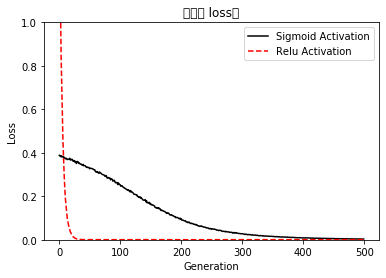

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)

batch_size = 50 #지역해를 방지하기 위함
# normal은 정규분포, uniform은 균등분포
# 가중치는 반드시 초기화하고 사용한다.

a1 = tf.Variable(tf.random_normal(shape=[1,1])) #가중치
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

#0~1 확률값으로 매핑
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

# sum((sigmoid_activation - 0.75)^2) / n 을 연산하는 것과 같은 의미
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

init = tf.global_variables_initializer()
sess.run(init)#가중치 초기화

my_opt = tf.train.GradientDescentOptimizer(0.01) # learning rate = 학습률
train_step_sigmoid = my_opt.minimize(loss1) 
train_step_relu = my_opt.minimize(loss2)
print('\n Sigmoid AND Relu 함수의 최적화 0.75')

loss_vec_sigmoid = []
loss_vec_relu = []
for i in range(500): # epoch = 500
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]]) #행렬곱을 위한 전치행렬화
    
    #model은 동일하고 activation 함수만 다름
    sess.run(train_step_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_step_relu, feed_dict={x_data: x_vals})
    
    #loss값의 변화를 listing
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))    
    
    #예측
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals}))
    
    if i%50==0:
        print('sigmoid = ' + str(np.mean(sigmoid_output)) + ' relu = ' + str(np.mean(relu_output)))
       

plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('세대별 loss값')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show() 

In [8]:
import tensorflow as tf
with tf.name_scope("Scope_A"): #scope 변수의 범위
    a = tf.add(1,2,name="A_add") # node : operation 연산 : 모델을 저장했다가 로딩할 때 Tensorboard 위치 확인
    b = tf.multiply(a,3,name="A_mul")
with tf.name_scope("Scope_B"):
    c = tf.add(4,5,name="B_add")
    d = tf.multiply(a,6,name="B_mul")

e = tf.add(b,d,name="output")
writer = tf.summary.FileWriter("/tmp/name_scope_2", graph=tf.get_default_graph())
writer.close

sess=tf.Session()
print(sess.run(e))

27


Anaconda prompt에서 tensorboard 실행 (tensorboard --logdir=/tmp)
크롬에서 Tensorgraph 확인 가능 (http://localhost:6006)

In [9]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

learning_rate = 0.01
training_epochs = 1000
display_step = 50

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0] 

In [10]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [12]:
pred = tf.add(tf.multiply(X,W),b) # 모델
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples) # 손실함수
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #옵티마이저
init = tf.global_variables_initializer()

W0907 12:47:14.361962  9496 deprecation.py:323] From C:\Users\KITCOOP\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
#세션연결후 데이터 주입하면서 학습. with 구문을 쓰는 이유는 세션 연결후 자동으로 종료되기 때문 (자원소모 최소화)
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X: x,Y: y})
        
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=","{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
    
    print("최적화 종료")
    training_cost = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
    print("Training cost=",training_cost,"W=", sess.run(W), "b=", sess.run(b))

Epoch: 0050 cost= 0.156526104 W= 0.40732265 b= -0.3332251
Epoch: 0100 cost= 0.147333592 W= 0.39794177 b= -0.26573962
Epoch: 0150 cost= 0.139202788 W= 0.3891188 b= -0.20226784
Epoch: 0200 cost= 0.132011086 W= 0.38082054 b= -0.14257078
Epoch: 0250 cost= 0.125650123 W= 0.37301588 b= -0.086424485
Epoch: 0300 cost= 0.120023951 W= 0.36567533 b= -0.033617467
Epoch: 0350 cost= 0.115047716 W= 0.3587714 b= 0.016048944
Epoch: 0400 cost= 0.110646337 W= 0.35227814 b= 0.062761396
Epoch: 0450 cost= 0.106753521 W= 0.34617096 b= 0.106695704
Epoch: 0500 cost= 0.103310458 W= 0.34042713 b= 0.14801688
Epoch: 0550 cost= 0.100265287 W= 0.33502477 b= 0.18688047
Epoch: 0600 cost= 0.097571984 W= 0.32994387 b= 0.22343282
Epoch: 0650 cost= 0.095189944 W= 0.32516497 b= 0.25781146
Epoch: 0700 cost= 0.093083210 W= 0.32067028 b= 0.2901456
Epoch: 0750 cost= 0.091219984 W= 0.31644303 b= 0.3205564
Epoch: 0800 cost= 0.089572214 W= 0.3124673 b= 0.34915778
Epoch: 0850 cost= 0.088114910 W= 0.3087278 b= 0.37605906
Epoch: 090

Training cost= 0.08467842 W= 0.29879197 b= 0.44753677


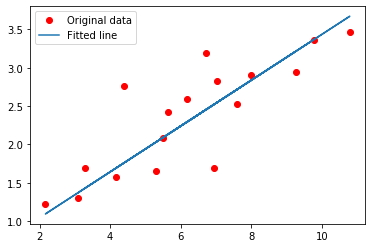

In [24]:
#회귀선 출력
sess = tf.Session()
sess.run(init)
for epoch in range(training_epochs):
    for (x,y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict = {X: x,Y: y})

    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
training_cost = sess.run(cost, feed_dict={X:train_X, Y:train_Y})

print("Training cost=",training_cost,"W=", sess.run(W), "b=", sess.run(b))
plt.plot(train_X, train_Y, 'ro', label='Original data') # 산포도
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line') #회귀선
plt.legend()
plt.show()

# pandas를 이용한 회귀
 - 데이터를 데이터프레임으로 준비

In [26]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import tensorflow as tf
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['const'] = np.ones(df.shape[0])
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,const
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,1.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,1.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,1.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,1.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,1.0


In [27]:
n, m = df.shape

X = tf.placeholder(tf.float64, shape=(n, m))
y = tf.placeholder(tf.float64, shape=(n, 1))

XT = tf.transpose(X)
w = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y) #행렬에는 나눗셈이 없어서 역행렬을 구한 다음 곱해주면 나눗셈이 됨
y_pred = tf.matmul(X, w)

with tf.Session() as sess:
    y_pred_ = sess.run(y_pred, feed_dict={X: df.values, y: boston.target.reshape(-1, 1)})

print("예측한 집값 :", y_pred_[19], "실제 집값 :", boston.target[19]) 

예측한 집값 : [18.40613603] 실제 집값 : 18.2


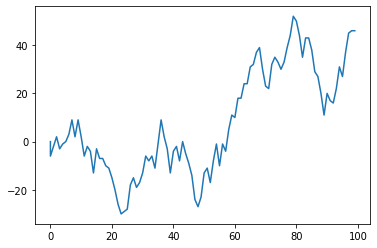

In [28]:
import random
import matplotlib.pylab as plt
data = [0]
expected = [0]
random.seed(100)
for i in range(100) :
    expected.append(expected[-1] + random.randint(-10,10))
    data.append(i)

plt.plot(data,expected)
plt.show()

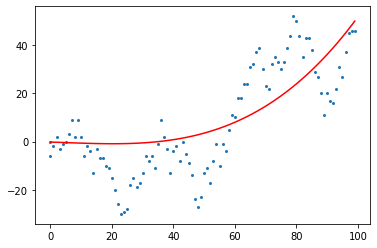

In [29]:
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32)

W1 = tf.Variable([0.1], tf.float32)
W2 = tf.Variable([0.1], tf.float32)
W3 = tf.Variable([0.1], tf.float32)
b = tf.Variable([0.1], tf.float32)

#데이터의 형태를 보니 선형이 아닐 것 같다. 3차 방정식 모델을 고려해본다
linear_model = W1 * x + W2 * x**2 + W3 * x**3 + b

loss = tf.reduce_sum(tf.square(linear_model - y))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

saver = tf.train.Saver()
for i in range(10000):
    sess.run(train, {x: data, y: expected})

predicted = sess.run(linear_model, {x: [i for i in range(100)]})
plt.plot(data, expected, 'o', markersize=2)
plt.plot(predicted, 'r')
plt.show() 

In [30]:
import tensorflow as tf
print(tf.__version__)
'''
경고 메시지를 무시하고 싶은 경우 무시 옵션
import warnings
warnings.filterwarnings(action='ignore')

주피터노트북 상에서 코드를 보존하고 경고메시지만 지우고 싶은 경우
-> 해당 블록에서 ESC - M - Y
'''

1.14.0


In [31]:
import warnings
warnings.filterwarnings(action='ignore')

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [42]:
Xtr,Ytr = mnist.train.next_batch(5000)
Xte,Yte = mnist.test.next_batch(200)
xtr = tf.placeholder("float",[None,784])
xte = tf.placeholder("float",[784])

distance = tf.reduce_sum(tf.abs(tf.add(xtr,tf.negative(xte))),reduction_indices=1)
pred = tf.argmin(distance,0)
accuracy =0.
init = tf.global_variables_initializer()

In [45]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(len(Xte)) :
        nn_index = sess.run(pred, feed_dict={xtr : Xtr, xte : Xte[i,:]})
        print("Test",i,"Prediction:",np.argmax(Ytr[nn_index]),"True Class:",np.argmax(Yte[i]))
        if np.argmax(Ytr[nn_index])==np.argmax(Yte[i]) :
            accuracy +=1./len(Xte)
    print("Accuracy:", accuracy)

Test 0 Prediction: 8 True Class: 8
Test 1 Prediction: 0 True Class: 0
Test 2 Prediction: 1 True Class: 1
Test 3 Prediction: 6 True Class: 6
Test 4 Prediction: 0 True Class: 0
Test 5 Prediction: 6 True Class: 6
Test 6 Prediction: 7 True Class: 7
Test 7 Prediction: 3 True Class: 3
Test 8 Prediction: 5 True Class: 5
Test 9 Prediction: 7 True Class: 7
Test 10 Prediction: 1 True Class: 1
Test 11 Prediction: 0 True Class: 0
Test 12 Prediction: 0 True Class: 0
Test 13 Prediction: 7 True Class: 7
Test 14 Prediction: 5 True Class: 5
Test 15 Prediction: 6 True Class: 5
Test 16 Prediction: 3 True Class: 3
Test 17 Prediction: 2 True Class: 2
Test 18 Prediction: 0 True Class: 0
Test 19 Prediction: 1 True Class: 1
Test 20 Prediction: 0 True Class: 0
Test 21 Prediction: 8 True Class: 5
Test 22 Prediction: 8 True Class: 8
Test 23 Prediction: 0 True Class: 0
Test 24 Prediction: 2 True Class: 2
Test 25 Prediction: 8 True Class: 8
Test 26 Prediction: 5 True Class: 5
Test 27 Prediction: 7 True Class: 7
Te

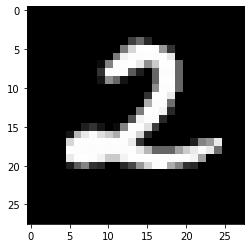

In [50]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

first_image = mnist.test.images[3]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()  

In [ ]:
#kmeans 를 텐서플로우로 구현

In [53]:
import tensorflow as tf
sess=tf.Session()
val = [0,2,3]
val = tf.tile(val,[5])
print("홀일 때 \n", sess.run(val))
val = [[1,1,1],[2,2,2],[3,3,3]]
val = tf.tile(val,[5,2])
print("2차원일 때 \n", sess.run(val))

홀일 때 
 [0 2 3 0 2 3 0 2 3 0 2 3 0 2 3]
2차원일 때 
 [[1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]]


In [ ]:
#군집분석 : kmeans 대표적인 모델
3개 군집 : 중심을 3개 선택
- 각 데이터와 군집의 중심을 빼서 거리값을 계산
- 거리값이 가장 가까운 중심으로 군집을 선택
- 다시 중심값 재계산(중심값이 변화)

In [56]:
input_vecs = [[1.,2.],[2.,1.],[-2.,-1.]]
print("차원확대:",sess.run(tf.expand_dims(input_vecs,0))) #행 방향으로 확대
print("차원확대:",sess.run(tf.expand_dims(input_vecs,1))) # 열 방향으로 확대

차원확대: [[[ 1.  2.]
  [ 2.  1.]
  [-2. -1.]]]
차원확대: [[[ 1.  2.]]

 [[ 2.  1.]]

 [[-2. -1.]]]


In [58]:
#군집분석 => 지도학습 데이터를 활용
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from scipy.spatial import cKDTree
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess=tf.Session()
iris=datasets.load_iris()

In [62]:
num_pts = len(iris.data) #데이터 개수
num_feats = len(iris.data[0]) #특성 개수

k=3 
generations = 25

data_points = tf.Variable(iris.data) #150개 데이터 포인트
cluster_labels = tf.Variable(tf.zeros([num_pts], dtype=tf.int64))#클러스터링 넘버 공간 확보

rand_starts = np.array([iris.data[np.random.choice(len(iris.data))] for _ in range(k)]) #python에서 _ 은 직전에 계산된 값을 의미
centroids = tf.Variable(rand_starts)
centroid_matrix = tf.reshape(tf.tile(centroids, [num_pts, 1]), [num_pts, k, num_feats])
point_matrix = tf.reshape(tf.tile(data_points, [1, k]), [num_pts, k, num_feats])
distances = tf.reduce_sum(tf.square(point_matrix - centroid_matrix), axis=2)


centroid_group = tf.argmin(distances, 1)

In [61]:
#unsorted_segment_sum 그룹번호로 합계
c = tf.constant([[1,2,3,4],[5,6,7,8],[4,3,2,1]])
sess.run(tf.unsorted_segment_sum(c,tf.constant([0,1,0]),num_segments=2))

array([[5, 5, 5, 5],
       [5, 6, 7, 8]])

In [63]:
#그룹별로 중심점을 재계산하는 함수
def data_group_avg(group_ids, data):
    sum_total = tf.unsorted_segment_sum(data, group_ids, 3)
    num_total = tf.unsorted_segment_sum(tf.ones_like(data), group_ids, 3)  
    avg_by_group = sum_total/num_total
    return(avg_by_group)

means = data_group_avg(centroid_group, data_points)

#그룹값이 재지정되고 그룹번호가 매겨짐
update = tf.group(centroids.assign(means), cluster_labels.assign(centroid_group))
init = tf.global_variables_initializer()
sess.run(init)

for i in range(generations):  
    print('Calculating gen {}, out of {}.'.format(i, generations))
    _, centroid_group_count = sess.run([update, centroid_group])
    group_count = []
    for ix in range(k):
        group_count.append(np.sum(centroid_group_count==ix))
    print('Group counts: {}'.format(group_count))
   
[centers, assignments] = sess.run([centroids, cluster_labels])

def most_common(my_list):
    return(max(set(my_list), key=my_list.count))

label0 = most_common(list(assignments[0:50])) 
label1 = most_common(list(assignments[50:100]))
label2 = most_common(list(assignments[100:150]))

group0_count = np.sum(assignments[0:50]==label0)
group1_count = np.sum(assignments[50:100]==label1)
group2_count = np.sum(assignments[100:150]==label2)

accuracy = (group0_count + group1_count + group2_count)/150.

print('Accuracy: {:.2}'.format(accuracy))

Calculating gen 0, out of 25.
Group counts: [55, 10, 85]
Calculating gen 1, out of 25.
Group counts: [53, 18, 79]
Calculating gen 2, out of 25.
Group counts: [51, 26, 73]
Calculating gen 3, out of 25.
Group counts: [50, 33, 67]
Calculating gen 4, out of 25.
Group counts: [50, 36, 64]
Calculating gen 5, out of 25.
Group counts: [50, 38, 62]
Calculating gen 6, out of 25.
Group counts: [50, 38, 62]
Calculating gen 7, out of 25.
Group counts: [50, 38, 62]
Calculating gen 8, out of 25.
Group counts: [50, 38, 62]
Calculating gen 9, out of 25.
Group counts: [50, 38, 62]
Calculating gen 10, out of 25.
Group counts: [50, 38, 62]
Calculating gen 11, out of 25.
Group counts: [50, 38, 62]
Calculating gen 12, out of 25.
Group counts: [50, 38, 62]
Calculating gen 13, out of 25.
Group counts: [50, 38, 62]
Calculating gen 14, out of 25.
Group counts: [50, 38, 62]
Calculating gen 15, out of 25.
Group counts: [50, 38, 62]
Calculating gen 16, out of 25.
Group counts: [50, 38, 62]
Calculating gen 17, out 

In [66]:
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
import random
import numpy as np
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [67]:
response=6
batch_size=50
symmetry = ['rotate180','rotate90','rotate270','flip_v','flip_h']

[]
500
[([0, 0, 0, 0, 0, 0, -1, 0, 0], 4), ([0, 0, 0, -1, 0, 0, 0, 0, 0], 0), ([0, 0, 1, 1, -1, -1, -1, 0, 0], 0), ([0, 0, 0, -1, -1, 0, 0, 0, 1], 5), ([0, -1, 0, 0, 0, 0, 0, 0, 0], 2), ([0, 0, 0, -1, 0, 0, 0, 0, 0], 0), ([0, -1, 1, 0, 0, -1, 0, 0, 0], 7), ([0, 0, 0, 0, 0, 0, -1, 0, 0], 4), ([0, 0, 0, -1, 0, 0, 1, -1, 0], 1), ([0, -1, 1, 0, 0, 0, -1, 0, 0], 4), ([0, 0, 0, 0, 0, 0, 0, -1, 0], 8), ([1, -1, 0, -1, 0, 1, 0, 0, -1], 7), ([-1, 0, 0, 0, -1, 0, 0, 0, 1], 2), ([0, -1, 1, 0, 0, -1, 0, 0, 0], 7), ([1, -1, 1, 0, -1, 0, -1, 0, 0], 8), ([0, 0, 0, 0, 0, 0, -1, -1, 1], 5), ([0, 0, 0, 0, 0, 0, 0, -1, 0], 2), ([-1, 0, 0, 1, -1, -1, 0, 0, 1], 6), ([1, -1, 0, -1, 0, 0, 0, 0, 0], 5), ([-1, 0, 0, 1, -1, -1, 0, 0, 1], 6), ([0, 0, 1, 0, 0, -1, -1, 0, 0], 4), ([1, 1, -1, 0, -1, 0, 0, -1, 0], 6), ([-1, 0, 0, 0, 0, 0, 1, -1, 0], 4), ([0, 0, 0, 0, -1, 0, 0, 0, 0], 6), ([1, -1, 0, 0, 0, 0, -1, 0, 0], 4), ([1, 0, 0, -1, -1, 1, 0, -1, 0], 1), ([1, -1, 0, 0, 0, -1, 0, 0, 0], 6), ([0, 0, 0, -1, -1, 1,

iteration 0 Loss: 5.7752104
iteration 500 Loss: 1.7661096
iteration 1000 Loss: 1.2672353
iteration 1500 Loss: 1.4874538
iteration 2000 Loss: 1.2745683
iteration 2500 Loss: 1.3190793
iteration 3000 Loss: 1.1290678
iteration 3500 Loss: 0.99654746
iteration 4000 Loss: 0.9578474
iteration 4500 Loss: 0.9377024
iteration 5000 Loss: 0.95188
iteration 5500 Loss: 0.945897
iteration 6000 Loss: 0.6426716
iteration 6500 Loss: 0.5970318
iteration 7000 Loss: 0.90279007
iteration 7500 Loss: 0.7777171
iteration 8000 Loss: 0.6094521
iteration 8500 Loss: 0.53022516
iteration 9000 Loss: 0.74063104
iteration 9500 Loss: 0.69759095


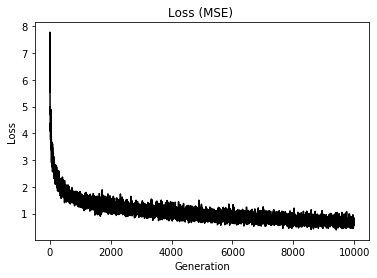

[6]
[6]
이동하고 싶은 인덱스를 입력하시요 (0-8): 6
모델이 이동하였습니다.
   |   |  
___________
   |   |  
___________
 X |   | O
이동하고 싶은 인덱스를 입력하시요 (0-8): 4
모델이 이동하였습니다.
 O |   |  
___________
   | X |  
___________
 X |   | O
이동하고 싶은 인덱스를 입력하시요 (0-8): 2
모델이 이동하였습니다.
 O |   | X
___________
   | X | O
___________
 X |   | O
게임 종료! 승리하셨습니다.  


In [70]:
def print_board(board):
    symbols = ['O',' ','X']
    board_plus1 = [int(x) + 1 for x in board]
    print(' ' + symbols[board_plus1[0]] + ' | ' + symbols[board_plus1[1]] 
          + ' | ' + symbols[board_plus1[2]])
    print('___________')
    print(' ' + symbols[board_plus1[3]] + ' | ' + symbols[board_plus1[4]] 
          + ' | ' + symbols[board_plus1[5]])
    print('___________')
    print(' ' + symbols[board_plus1[6]] + ' | ' + symbols[board_plus1[7]] 
          + ' | ' + symbols[board_plus1[8]])

#다양한 경우를 훈련하기 위해 경우의 수를 늘리기 위한 함수
def get_symmetry(board, response, transformation):
    if transformation == 'rotate180': 
        new_response = 8 - response
        return(board[::-1], new_response)
    
    elif transformation == 'rotate90': 
        new_response = [6, 3, 0, 7, 4, 1, 8, 5, 2].index(response)
        tuple_board = list(zip(*[board[6:9], board[3:6], board[0:3]]))
        return([value for item in tuple_board for value in item], 
               new_response)
    
    elif transformation == 'rotate270':
        new_response = [2, 5, 8, 1, 4, 7, 0, 3, 6].index(response)
        tuple_board = list(zip(*[board[0:3], board[3:6], board[6:9]]))[::-1]
        return([value for item in tuple_board for value in item], 
               new_response)
    
    elif transformation == 'flip_v': # 0 1 2 , 3 4 5 , 6 7 8
        new_response = [6, 7, 8, 3, 4, 5, 0, 1, 2].index(response)
        return(board[6:9] +  board[3:6] + board[0:3], new_response)
    
    elif transformation == 'flip_h':  
        new_response = [2, 1, 0, 5, 4, 3, 8, 7, 6].index(response)
        new_board = board[::-1]
        return(new_board[6:9] +  new_board[3:6] + new_board[0:3], 
               new_response)
    else:
        raise ValueError('해당하는 경우가 없음')
 

def get_moves_from_csv(csv_file):
    moves = []
    with open(csv_file, 'rt') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            moves.append(([int(x) for x in row[0:9]],int(row[9])))
    return(moves)

def get_rand_move(moves, n=1, rand_transforms=2):
    (board, response) = random.choice(moves) 
    possible_transforms = ['rotate90', 'rotate180', 'rotate270', 
                           'flip_v', 'flip_h'] 
    for i in range(rand_transforms): 
        random_transform = random.choice(possible_transforms)
        (board, response) = get_symmetry(board, response, random_transform) 
    return(board, response)


moves = get_moves_from_csv('tictactoe_moves.csv')
train_length = 500
train_set = []
print(train_set)

for t in range(train_length):
    train_set.append(get_rand_move(moves)) 
print(len(train_set))
print(train_set)
test_board = [-1, 0, 0, 1, -1, -1, 0, 0, 1]
train_set = [x for x in train_set if x[0] != test_board]
print(train_set)


def init_weights(shape):
    return(tf.Variable(tf.random_normal(shape)))


def model(X, A1, A2, bias1, bias2): 
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(X, A1), bias1)) 
    layer2 = tf.add(tf.matmul(layer1, A2), bias2) 
    return(layer2)

#-1은 컴퓨터의 수, 1은 유저의 수, Y는 말을 놓을 위치
X = tf.placeholder(dtype=tf.float32, shape=[None, 9]) 
Y = tf.placeholder(dtype=tf.int32, shape=[None])

A1 = init_weights([9, 81])   #9, 81 -> 특징을 81개로 늘림
bias1 = init_weights([81])   
A2 = init_weights([81, 9])   # 81 x 9 -> 9 개의 분류기
bias2 = init_weights([9])
model_output = model(X, A1, A2, bias1, bias2)


loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
    logits=model_output, labels=Y))
train_step = tf.train.GradientDescentOptimizer(0.025).minimize(loss)
prediction = tf.argmax(model_output, 1)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

loss_vec = []
for i in range(10000):
    rand_indices = np.random.choice(range(len(train_set)), batch_size, 
                                    replace=False)
    batch_data = [train_set[i] for i in rand_indices]
    x_input = [x[0] for x in batch_data]
    y_target = np.array([y[1] for y in batch_data]) 
    sess.run(train_step, feed_dict={X: x_input, Y: y_target})    
    temp_loss = sess.run(loss, feed_dict={X: x_input, Y: y_target})
    loss_vec.append(temp_loss)
    if i%500==0:
        print('iteration ' + str(i) + ' Loss: ' + str(temp_loss))


plt.plot(loss_vec, 'k-', label='Loss')
plt.title('Loss (MSE) ')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()
test_boards = [test_board]
feed_dict = {X: test_boards}
logits = sess.run(model_output, feed_dict=feed_dict)
predictions = sess.run(prediction, feed_dict=feed_dict)
print(predictions)

 

test_boards = [test_board]
feed_dict = {X: test_boards}
logits = sess.run(model_output, feed_dict=feed_dict)
predictions = sess.run(prediction, feed_dict=feed_dict)
print(predictions)

def check(board): 
    wins = [[0,1,2], [3,4,5], [6,7,8], [0,3,6], [1,4,7], [2,5,8], 
            [0,4,8], [2,4,6]]
    for i in range(len(wins)):
        if board[wins[i][0]]==board[wins[i][1]]==board[wins[i][2]]==1.:
            return(1)
        elif board[wins[i][0]]==board[wins[i][1]]==board[wins[i][2]]==-1.:
            return(-1)
    return(0)


game_tracker = [0., 0., 0., 0., 0., 0., 0., 0., 0.] 
win_logical = False
num_moves = 0                 

while not win_logical: 
    player_index = input('이동하고 싶은 인덱스를 입력하시요 (0-8): ')
    num_moves += 1 
    game_tracker[int(player_index)] = 1.

    [potential_moves] = sess.run(model_output, 
                                 feed_dict={X: [game_tracker]})

    allowed_moves = [ix for ix,x in enumerate(game_tracker) if x==0.0]   

    model_move = np.argmax([x if ix in allowed_moves else -999.0 
                            for ix,x in enumerate(potential_moves)])  
    game_tracker[int(model_move)] = -1.
    print('모델이 이동하였습니다.')
    print_board(game_tracker)
    if check(game_tracker)==1 or num_moves>=20: 
        print('게임 종료! 승리하셨습니다.  ')
        win_logical = True
    elif check(game_tracker)== -1:
        print('게임 종료 ! 게임에 지셨습니다. !')
        win_logical = True